In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [3]:
print(dir(pd))

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'conca

In [62]:
cust = pd.read_csv(r"C:\Users\abira\OneDrive\Desktop\Data Science 360\Python Projects\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
cust

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [38]:
repay = pd.read_csv(r"C:\Users\abira\OneDrive\Desktop\Data Science 360\Python Projects\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Repayment.csv")
repay

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [39]:
repay.isna().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [40]:
repay.drop('Unnamed: 4', axis = 1, inplace=True)
repay.dropna(axis=0, how = 'all', inplace = True)

In [67]:
repay.columns = ['SL_No', 'Customer', 'Month', 'Amount']
repay.head()

,SL_No,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [72]:
spend = pd.read_csv(r"C:\Users\abira\OneDrive\Desktop\Data Science 360\Python Projects\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\spend.csv")
spend.sort_values('Customer')

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
200,201,A1,2-Apr-06,TRAIN TICKET,176372.82
214,215,A1,25-Jan-04,TRAIN TICKET,394970.96
228,229,A1,23-Feb-05,CLOTHES,476702.09
186,187,A1,3-Feb-05,FOOD,155611.91
...,...,...,...,...,...
96,97,A95,15-Jan-04,CAR,240401.50
97,98,A96,25-Jan-04,BIKE,54729.66
98,99,A97,12-Jan-04,AUTO,139018.26
99,100,A98,3-Jan-04,SHOPPING,284521.06


In [45]:
spend.columns = ['Sl_No', 'Customer', 'Month', 'Type', 'Amount']
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl_No     1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [63]:
## 1. In the above dataset,
## a. In case age is less than 18, replace it with mean of age values

cust[(cust.Age<18)]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,63,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,16,BOMBAY,Platimum,10001.0,C32,Self Employed
89,90,A90,16,COCHIN,Gold,500000.0,C13,Govt


In [60]:
cust.Age.mean().round()

48.0

In [64]:
cust['Age'] = np.where(cust.Age<18, cust.Age.mean().round(), cust.Age)
cust.loc[60:70,]

,No,Customer,Age,City,Product,Limit,Company,Segment
60,61,A61,44.0,COCHIN,Gold,500000.0,C23,Govt
61,62,A62,39.0,BOMBAY,Gold,500000.0,C24,Normal Salary
62,63,A63,46.0,BANGALORE,Gold,500000.0,C25,Self Employed
63,64,A64,77.0,DELHI,Gold,500000.0,C26,Salaried_MNC
64,65,A65,41.0,COCHIN,Gold,500000.0,C27,Salaried_Pvt
65,66,A66,77.0,PATNA,Gold,500000.0,C28,Govt
66,67,A67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary
67,68,A68,46.0,TRIVANDRUM,Silver,100000.0,C30,Self Employed
68,69,A69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed
69,70,A70,46.0,BOMBAY,Platimum,10001.0,C32,Self Employed


In [91]:
## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
## (customer’s limit provided in acquisition table is the per transaction limit on his card)

limit = pd.merge(spend, cust, left_on = 'Customer', right_on = "Customer", how = 'left')
limit

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73,67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10,68,46.0,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44,69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94,70,46.0,BOMBAY,Platimum,10001.0,C32,Self Employed


In [92]:
limit['new_limit'] = np.where(limit['Amount']>limit['Limit'], limit.Limit/2, limit.Limit)
limit

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,new_limit
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,500000.0
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,500000.0
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,500000.0
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,500000.0
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73,67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary,500000.0
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10,68,46.0,TRIVANDRUM,Silver,100000.0,C30,Self Employed,50000.0
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44,69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,5000.0
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94,70,46.0,BOMBAY,Platimum,10001.0,C32,Self Employed,5000.5


In [94]:
## c. Incase the repayment amount is more than the limit, replace the repayment with the limit.
repayment = pd.merge(repay, cust, left_on = 'Customer', right_on = 'Customer', how = 'left')
repayment

,SL_No,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77,67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497.0,A68,10-May-06,319836.49,68,46.0,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498.0,A69,11-Jul-06,247628.45,69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499.0,A70,12-Aug-05,454016.51,70,46.0,BOMBAY,Platimum,10001.0,C32,Self Employed


In [95]:
repayment['new_repayment'] = np.where(repayment.Amount>repayment.Limit, repayment.Limit, repayment.Amount)
repayment

,SL_No,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,new_repayment
0,NaN,A1,12-Jan-04,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,495414.75
1,2.0,A1,3-Jan-04,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,245899.02
2,3.0,A1,15-Jan-04,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,259490.06
3,4.0,A1,25-Jan-04,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,437555.12
4,5.0,A1,17-Jan-05,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77,67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary,55638.77
1496,1497.0,A68,10-May-06,319836.49,68,46.0,TRIVANDRUM,Silver,100000.0,C30,Self Employed,100000.00
1497,1498.0,A69,11-Jul-06,247628.45,69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,10000.00
1498,1499.0,A70,12-Aug-05,454016.51,70,46.0,BOMBAY,Platimum,10001.0,C32,Self Employed,10001.00


In [102]:
##2. From the above dataset create the following summaries:
##  a. How many distinct customers exist?

cust.Customer.nunique()

100

In [105]:
## b. How many distinct categories exist?

spend.Type.nunique()

15

In [107]:
spend.sample()

,Sl No:,Customer,Month,Type,Amount
497,498,A12,3-Aug-06,RENTAL,319708.92


In [110]:
## c. What is the average monthly spend by customers?

spend['Month'] = pd.to_datetime(spend.Month, dayfirst = True)
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [127]:
spend.columns = ['Sl_No:', 'Customer', 'Date', 'Type', 'Amount']

In [128]:
spend.head(5)

,Sl_No:,Customer,Date,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [130]:
spend['Month'] = spend.Date.dt.month
spend['Year'] = spend.Date.dt.year
spend.groupby(["Year", "Month"])['Amount'].mean()

Year  Month
2004  1        251712.068664
      2        221215.270000
      3        232146.119286
      4        235272.037143
      5        217539.236429
      9        310923.383571
      11       270486.397857
2005  1        292741.372857
      2        229802.279821
      4        252181.326429
      5        245696.515429
      6        262688.112857
      7        229116.663571
      8        233734.634286
      9        188666.202143
      10       194568.640714
      11       286143.322857
      12       147503.060000
2006  1        282058.006429
      2        253858.260714
      3        247166.084654
      4        232468.967553
      5        236162.740357
      6        177252.386429
      7        287505.098929
      8        240699.717143
      9        158520.090714
      10       236136.335000
      11       182841.290000
      12       270470.980714
Name: Amount, dtype: float64

In [134]:
## d. What is the average monthly repayment by customers?

repay.columns = ['SL_No', 'Customer', 'Date', 'Amount']
repay['Date'] = pd.to_datetime(repay.Date, dayfirst = True)
repay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL_No     1499 non-null   float64       
 1   Customer  1500 non-null   object        
 2   Date      1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 58.6+ KB


In [135]:
repay['Month'] = repay.Date.dt.month
repay['Year'] = repay.Date.dt.year
repay

,SL_No,Customer,Date,Amount,Month,Year
0,NaN,A1,2004-01-12,495414.75,1,2004
1,2.0,A1,2004-01-03,245899.02,1,2004
2,3.0,A1,2004-01-15,259490.06,1,2004
3,4.0,A1,2004-01-25,437555.12,1,2004
4,5.0,A1,2005-01-17,165972.88,1,2005
...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,5,2005
1496,1497.0,A68,2006-05-10,319836.49,5,2006
1497,1498.0,A69,2006-07-11,247628.45,7,2006
1498,1499.0,A70,2005-08-12,454016.51,8,2005


In [137]:
repay.groupby(['Year', 'Month'])['Amount'].mean().round(2)

Year  Month
2004  1        243489.65
      2        256702.63
      3        252585.28
      4        259141.68
      5        226162.72
      9        184487.85
      11       209592.24
2005  1        240548.10
      2        238829.27
      4        212688.63
      5        263207.37
      6        210199.82
      7        239871.48
      8        264430.92
      9        247700.17
      10       219849.96
      11       256695.12
      12       320379.34
2006  1        293475.39
      2        284489.57
      3        240851.27
      4        275472.25
      5        256920.88
      6        251990.45
      7        257936.38
      8        224143.99
      9        262533.88
      10       260765.48
      11       199399.20
      12       252736.57
Name: Amount, dtype: float64

In [139]:
## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
## (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. 
## Interest is earned only on positive profits and not on negative amounts)



In [153]:
cust_spend = spend.groupby(['Customer','Year', 'Month'])['Amount'].sum().reset_index()
cust_spend

,Customer,Year,Month,Amount
0,A1,2004,1,2239644.04
1,A1,2004,2,52208.65
2,A1,2004,5,361141.31
3,A1,2005,1,369694.07
4,A1,2005,2,823969.80
...,...,...,...,...
802,A95,2004,1,240401.50
803,A96,2004,1,54729.66
804,A97,2004,1,139018.26
805,A98,2004,1,284521.06


In [152]:
cust_repay = repay.groupby(['Customer', 'Year', 'Month'])['Amount'].sum().reset_index()
cust_repay

,Customer,Year,Month,Amount
0,A1,2004,1,2241833.41
1,A1,2004,2,117964.43
2,A1,2005,1,165972.88
3,A1,2005,2,663909.37
4,A1,2005,7,297176.74
...,...,...,...,...
793,A95,2004,1,369405.96
794,A96,2004,1,310992.30
795,A97,2004,1,121874.90
796,A98,2004,1,337815.57


In [158]:
spend_repay = pd.merge(cust_spend, cust_repay, left_on = ['Customer', 'Year', 'Month'], right_on = ['Customer', 'Year', 'Month'])
spend_repay.columns = ['Customer', 'Year', 'Month', 'Amount_spent', 'Amount_repaid']
spend_repay

,Customer,Year,Month,Amount_spent,Amount_repaid
0,A1,2004,1,2239644.04,2241833.41
1,A1,2004,2,52208.65,117964.43
2,A1,2005,1,369694.07,165972.88
3,A1,2005,2,823969.80,663909.37
4,A1,2005,11,183839.61,402099.78
...,...,...,...,...,...
498,A95,2004,1,240401.50,369405.96
499,A96,2004,1,54729.66,310992.30
500,A97,2004,1,139018.26,121874.90
501,A98,2004,1,284521.06,337815.57


In [159]:
spend_repay['Monthly_Profit'] = spend_repay['Amount_repaid'] - spend_repay['Amount_spent']
spend_repay

,Customer,Year,Month,Amount_spent,Amount_repaid,Monthly_Profit
0,A1,2004,1,2239644.04,2241833.41,2189.37
1,A1,2004,2,52208.65,117964.43,65755.78
2,A1,2005,1,369694.07,165972.88,-203721.19
3,A1,2005,2,823969.80,663909.37,-160060.43
4,A1,2005,11,183839.61,402099.78,218260.17
...,...,...,...,...,...,...
498,A95,2004,1,240401.50,369405.96,129004.46
499,A96,2004,1,54729.66,310992.30,256262.64
500,A97,2004,1,139018.26,121874.90,-17143.36
501,A98,2004,1,284521.06,337815.57,53294.51


In [160]:
spend_repay_profit = spend_repay[spend_repay.Monthly_Profit>0]
spend_repay_profit

,Customer,Year,Month,Amount_spent,Amount_repaid,Monthly_Profit
0,A1,2004,1,2239644.04,2241833.41,2189.37
1,A1,2004,2,52208.65,117964.43,65755.78
4,A1,2005,11,183839.61,402099.78,218260.17
6,A10,2004,1,483432.98,880289.92,396856.94
10,A10,2006,3,356027.02,708491.02,352464.00
...,...,...,...,...,...,...
495,A92,2006,4,341858.87,459105.69,117246.82
496,A93,2004,1,297505.09,342326.14,44821.05
498,A95,2004,1,240401.50,369405.96,129004.46
499,A96,2004,1,54729.66,310992.30,256262.64


In [163]:
spend_repay_profit['Interest'] = (spend_repay_profit['Monthly_Profit']*0.029 + spend_repay_profit['Monthly_Profit']).round(2)
spend_repay_profit

C:\Users\abira\AppData\Local\Temp\ipykernel_23204\780116949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spend_repay_profit['Interest'] = (spend_repay_profit['Monthly_Profit']*0.029 + spend_repay_profit['Monthly_Profit']).round(2)


,Customer,Year,Month,Amount_spent,Amount_repaid,Monthly_Profit,Interest
0,A1,2004,1,2239644.04,2241833.41,2189.37,2252.86
1,A1,2004,2,52208.65,117964.43,65755.78,67662.70
4,A1,2005,11,183839.61,402099.78,218260.17,224589.71
6,A10,2004,1,483432.98,880289.92,396856.94,408365.79
10,A10,2006,3,356027.02,708491.02,352464.00,362685.46
...,...,...,...,...,...,...,...
495,A92,2006,4,341858.87,459105.69,117246.82,120646.98
496,A93,2004,1,297505.09,342326.14,44821.05,46120.86
498,A95,2004,1,240401.50,369405.96,129004.46,132745.59
499,A96,2004,1,54729.66,310992.30,256262.64,263694.26


In [165]:
spend_repay_profit.groupby(['Year', 'Month'])['Interest'].sum().reset_index()

,Year,Month,Interest
0,2004,1,11058280.13
1,2004,2,504925.08
2,2004,3,588750.51
3,2004,4,1382104.23
4,2004,5,1086983.52
5,2004,9,90174.47
6,2004,11,211322.88
7,2005,1,534212.29
8,2005,2,11590093.86
9,2005,4,804673.53


In [178]:
## f. What are the top 5 product types?

spend.groupby('Type')['Amount'].sum().sort_values(ascending = False).head(5)

Type
PETRO           49863174.09
CAMERA          41481571.96
FOOD            37773338.43
TRAIN TICKET    33067077.15
AIR TICKET      32955445.42
Name: Amount, dtype: float64

In [180]:
## g. Which city is having maximum spend?

spend_cust = pd.merge(spend, cust, left_on = 'Customer', right_on = 'Customer', how = 'left')
spend_cust

,Sl_No:,Customer,Date,Type,Amount,Month,Year,No,Age,City,Product,Limit,Company,Segment
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,2004,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,2004-01-03,PETRO,410556.13,1,2004,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,2004-01-15,CLOTHES,23740.46,1,2004,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,2004-01-25,FOOD,484342.47,1,2004,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,2005-01-17,CAMERA,369694.07,1,2005,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,2,2006,67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,3,2006,68,46.0,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,3,2006,69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,3,2006,70,46.0,BOMBAY,Platimum,10001.0,C32,Self Employed


In [185]:
spend_cust.groupby('City')['Amount'].sum().sort_values(ascending = False).head(1)

City
COCHIN    73495349.26
Name: Amount, dtype: float64

In [190]:
## h. Which age group is spending more money?

spend_cust['Age_Group'] = np.where(spend_cust.Age.between(18,30), 'Young Adult', 
                                   np.where(spend_cust.Age.between(31,40), "30's", 
                                   np.where(spend_cust.Age.between(41,50), "40's", 
                                   np.where(spend_cust.Age.between(51,60), "50's",
                                   np.where(spend_cust.Age.between(61,70), "60's",
                                   np.where(spend_cust.Age.between(71,80), "70's",
                                   np.where(spend_cust.Age.between(81,90), "80's", "Elder")))))))

spend_cust.groupby('Age_Group')['Amount'].sum().sort_values(ascending = False)

Age_Group
Young Adult    88238584.55
40's           76398230.39
30's           68525439.61
50's           66095358.93
70's           36389507.50
60's           28996953.21
Name: Amount, dtype: float64

In [194]:
## i. Who are the top 10 customers in terms of repayment?

repay.groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A22,9372561.68
4,A21,9056336.15
5,A43,8489871.46
6,A45,8448334.87
7,A12,8334760.16
8,A48,8292416.75
9,A14,7943268.63


In [221]:
## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

City_Wise_Data = pd.pivot_table(data = spend_cust, index = 'City', columns=['Product','Year'], 
               values='Amount', aggfunc='sum')
City_Wise_Data

Product           Gold                              Platimum               \
Year              2004         2005         2006        2004         2005   
City                                                                        
BANGALORE   9289878.54  12892362.99  12030611.09  6046763.93   7784194.68   
BOMBAY      6987853.53   8983018.28   7917144.31  5199581.00   5134074.48   
CALCUTTA    7477140.98  10303355.80  11167532.77  5961165.93   8810284.03   
CHENNAI     1059618.50   3740945.58   2704288.62  5558572.68   8868435.43   
COCHIN      7315850.15  12110613.03  10499142.38  8472832.23  10856722.82   
DELHI       2806495.00   1964845.27   2957103.32  1565199.90   2068490.16   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60   2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  3761433.87   7186762.35   

Product                      Silver                          
Year               2006        2004        2005        2006  
City                                                         
BANGALORE    5620904.86  6773901.65  3936068.22  4967945.66  
BOMBAY       7547549.72  3061805.08  2368375.97  3628864.37  
CALCUTTA    11305526.03  3321963.10  1285609.11  4783182.26  
CHENNAI      6921130.79  1156129.37  1000540.48  1665326.62  
COCHIN      12453968.83  4587738.70  2619231.25  4579249.87  
DELHI         764247.73  4293224.28  2515127.59  4581831.29  
PATNA        1256137.65  3398795.65  5244763.90  3111911.31  
TRIVANDRUM   4174473.45   795897.19  1445540.63  2005942.36

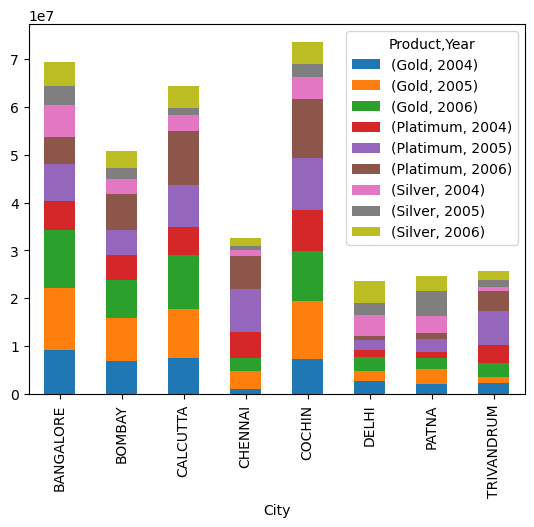

In [222]:
City_Wise_Data.plot(kind='bar',stacked=True)
plt.show()

In [224]:
## 4. Create graphs for
##   a. Monthly comparison of total spends, city wise

City_Month = pd.pivot_table(data = spend_cust, index = 'City', columns='Month', 
               values='Amount', aggfunc='sum')
City_Month

Month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,17782487.66,9875860.87,10765773.46,6182081.72,10743668.90,1382739.41,3737413.09,1552898.45,1306412.01,1855076.43,3435745.65,722473.97
BOMBAY,10681854.60,7813534.61,9857699.82,3726382.34,6974931.87,1486412.18,612457.59,1066744.75,1835082.87,1047561.39,5120665.55,604939.17
CALCUTTA,14163384.38,11449586.70,10076115.86,6883832.96,7868030.30,2693423.54,2323261.43,2179294.85,2208767.98,622463.42,3490771.91,456826.68
CHENNAI,7649568.68,5866408.35,4413870.52,3231144.38,4422623.36,1903803.90,1186667.37,681577.16,1591669.63,156247.17,1347779.28,223628.27
COCHIN,18692606.60,9459367.08,10733411.24,7070107.83,9912248.75,2738031.53,1758023.02,2582997.08,1739644.69,1668786.53,5128350.59,2011774.32
DELHI,7373794.37,3072043.85,3386628.30,2845176.75,2638193.66,828262.78,488399.04,475893.81,245802.04,64615.46,1130584.99,967169.49
PATNA,7388720.78,3466726.76,3795753.30,2786278.83,3476601.00,1653183.92,191003.23,813559.15,70329.95,329537.34,413677.87,223902.41
TRIVANDRUM,5688758.54,4459329.30,3855833.54,2775772.32,4631877.09,828576.89,960551.29,561400.55,215826.30,285581.92,856809.41,640922.26


<Figure size 2000x500 with 0 Axes>

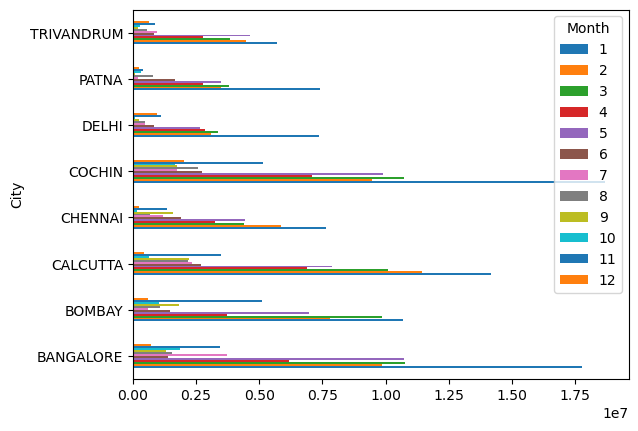

In [228]:
plt.figure(figsize = (20,5))
City_Month.plot(kind = 'barh')
plt.show()

In [239]:
## b. Comparison of yearly spend on air tickets

spend_air = spend.loc[spend.Type=='AIR TICKET',]
air_by_year = spend_air.groupby('Year')['Amount'].sum()
air_by_year

Year
2004     8370914.59
2005    14495718.73
2006    10088812.10
Name: Amount, dtype: float64

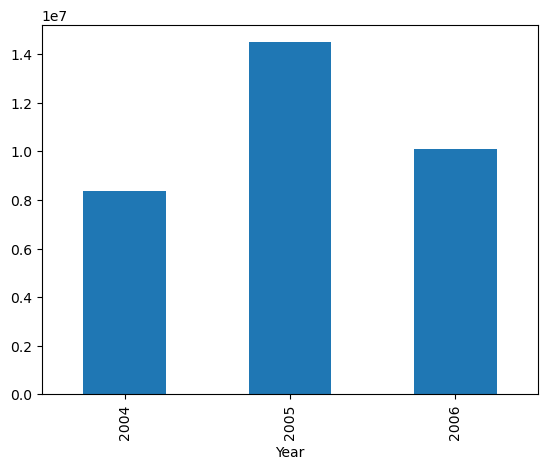

In [244]:
air_by_year.plot(kind = 'bar')
plt.show()

In [251]:
## c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)



product_by_month = pd.pivot_table(data = spend_cust, index = 'Product', columns='Month', values='Amount', aggfunc='sum').T
product_by_month

Product,Gold,Platimum,Silver
Month,,,
1,32413831.83,35212526.96,21794816.82
2,24779179.55,22081411.74,8602266.23
3,19256972.48,22639437.70,14988675.86
4,13170572.59,12798498.34,9531706.20
5,21548169.76,19380600.97,9739404.20
6,6538862.64,4756418.62,2219152.89
7,5167416.37,3695098.37,2395261.32
8,4954030.42,3892605.15,1067730.23
9,3816887.62,3411278.13,1985369.72


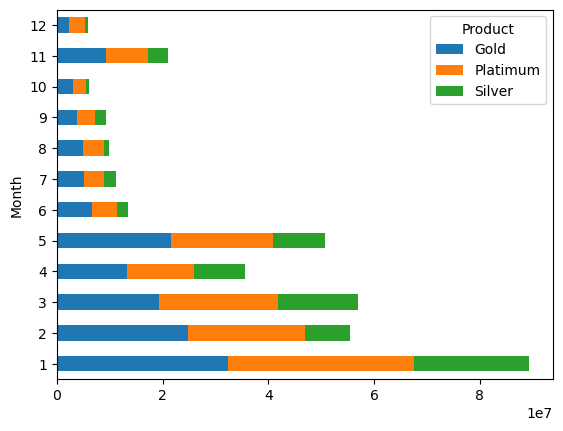

In [252]:
product_by_month.plot(kind='barh', stacked = True)
plt.show()

5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [275]:
repayment.columns = ['SL_No', 'Customer', 'Date', 'Amount', 'No', 'Age', 'City', 'Product',
       'Limit', 'Company', 'Segment', 'new_repayment']
repayment['Date'] = pd.to_datetime(repayment.Date, dayfirst = True)
repayment['Month'] = repayment.Date.dt.month
repayment['Year'] = repayment.Date.dt.year
repayment.sample()

,SL_No,Customer,Date,Amount,No,Age,City,Product,Limit,Company,Segment,new_repayment,Month,Year
1171,1172.0,A45,2004-01-15,357873.8,45,67.0,COCHIN,Gold,500000.0,C7,Salaried_Pvt,357873.8,1,2004


In [293]:
##def top10Customers():
  #  product_category = input("Please select the product type : Gold, Silver or Platinum ")
  ##  time_period = input("Please select the time period as Year or Month ")
  #  return repayment.loc[(repayment.Product == product_category)].groupby(['City','Customer',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [337]:
def top10Customers(): 
    product_category = input("Please select the product type : Gold, Silver or Platinum: ")
    time_period = input("Please select the time period as Year or Month: ")
    return repayment.loc[(repayment.Product == product_category)].groupby(['Customer','City',time_period]).Amount.sum().nlargest(n=10).reset_index().sort_values('Amount',ascending=False)

In [338]:
top10Customers()

Please select the product type : Gold, Silver or Platinum:  Silver
Please select the time period as Year or Month:  Year


,Customer,City,Year,Amount
0,A22,BOMBAY,2004,3455774.79
1,A46,PATNA,2005,3415340.60
2,A22,BOMBAY,2005,3395983.42
3,A25,COCHIN,2006,3231059.43
4,A24,DELHI,2005,3044224.68
5,A57,TRIVANDRUM,2004,2732428.36
6,A23,BANGALORE,2005,2631279.96
7,A46,PATNA,2006,2573969.61
8,A8,PATNA,2004,2573830.15
9,A22,BOMBAY,2006,2520803.47
